<a href="https://colab.research.google.com/github/AAhmadS/convex_opt/blob/main/99104027_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem 1

#Subproblem 1:

First let's rewrite the likelihood function:<br/>
$[N_t = k]= e^{-λ_t} λ_t ^ k / k!$<br/>
thus the log-likelihood would be as follows:<br/>
$−λ_t + N_tlog λ_t − log N_t!$<br/>
now with the independency assumption, we can find the solution to the problem by minimizing the negative sum of log-likelihood of different t parameters:<br/>

minimize $Σ_{t=1}^{24}(λ_t - N_tlog λ_t + log N_t)$<br/>
s.t $λ ≥ 0$<br/>

with variables $λ_1, . . . , λ_{24}$. Note that when Nₜ > 0, the log λₜ term is forced to be greater than 0.<br/>
Now that we have achieved the main convex problem, note that in this section the problem is separably solvable through each t, thus for each t:<br/>
first assume that Nₜ > 0. Then the minimizer satisfies
 $1 − N_t/λ_t = 0$
 , so
 $λ_t = N_t$
.
For
$N_t = 0$
, we minimize λₜ
, subject to
$λ_t ≥ 0$
. This gives
$λ_t = 0$.
 So in all cases
the MLE estimate is
$λ_t = N_t$.

#Subproblem 2

as we drop the constant terms, the final problem would be in the form:<br/>

minimize $∑_{t=1}^{24}(λ_t − N_tlog λ_t) + ρ ∑_{t=1}^{23}(λ_{t+1} − λ_t)^2 + (λ_1 − λ_{24})2$<br/>
s.t $ λ ≥ 0$

#Subproblem 3

As ρ → ∞, the λₜ all become equal, thus the equation form would become:<br/>
minimize $24λ̃̃ − (
∑_{t=1}^{24}
N_t) log λ̃
$<br/>
s.t $λ̃ ≥ 0$<br/>
in which $λ̃  = λ_t$ for each t.
The solution therefore, would be the constant λ̃ = N̄(comes from the point with derivative equal to zero)

#Subproblem 4

In [1]:
import pprint
import scipy
import scipy.linalg
import random
import numpy as np
import cvxpy as cvx
import matplotlib.pyplot as plt

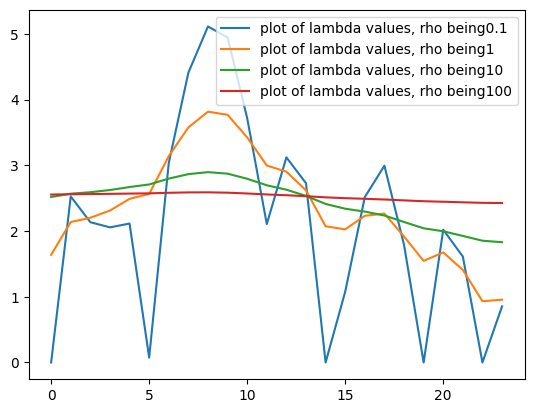

In [3]:
T = 24
N = np.array([0, 4, 2, 2, 3, 0, 4, 5, 6, 6, 4, 1,
4, 4, 0, 1, 3, 4, 2, 0, 3, 2, 0, 1])
rhos = [0.1, 1, 10, 100]
lambds = []
lambd = cvx.Variable(T, nonneg=True)
rho = cvx.Parameter(nonneg=True)
#objecive function
objective = cvx.Minimize(cvx.sum(lambd) - N @ cvx.log(lambd) + rho * cvx.sum_squares(cvx.diff(lambd)))
#constraints are given when introducing the variables
prob = cvx.Problem(objective)

for r in rhos :
  rho.value = r
  result = prob.solve()
  plt.plot(np.arange(T),lambd.value,label = f"plot of lambda values, rho being{r}")
  lambds.append(lambd.value)
  plt.legend()

In [5]:
from scipy.special import factorial
Ntest = np.array([0, 1, 3, 2, 3, 1, 4, 5, 3, 1, 4, 3,
5, 5, 2, 1, 1, 1, 2, 0, 1, 2, 1, 0])
for r, lambd in zip(rhos, lambds):
  test_logprob = np.sum(np.log(np.exp(-lambd) * lambd**Ntest / factorial(Ntest)))
  print(f"rho = {r}, log likelihood = {test_logprob}")

rho = 0.1, log likelihood = -83.56804634708554
rho = 1, log likelihood = -37.92308530269651
rho = 10, log likelihood = -41.242223840455544
rho = 100, log likelihood = -43.600868964269935


#Problem 2

#Subproblem 1

the problem can be written as:<br/>

maximize $R$<br/>
s.t $AX ≤ c_{max} \\X ≥ 0\\p >0\\ q>0\\R < pX\\R < pq + p^{disc}(X - q) $

In [24]:
N = 4
p = cvx.Parameter(N,nonneg=True)
p.value = [3,2,7,6]

p_dis = cvx.Parameter(N,nonneg=True)
p_dis.value = [2,1,4,2]

q = cvx.Parameter(N,nonneg=True)
q.value = [4,10,5,10]

c_max = np.array([100,100,100,100,100])
A = np.array([[1,2,0,1]
              ,[0,0,3,1]
              ,[0,3,1,1]
              ,[2,1,2,5]
              ,[1,0,3,2]])

X = cvx.Variable(N,nonneg=True)

R = cvx.Variable(N,nonneg=True)

obj = cvx.Maximize(cvx.sum(R))

constraints = []
constraints += [A @ X <= c_max]
constraints += [X >= 0, p >=0.00001, q>=0.00001]
constraints += [R <= cvx.multiply(p.T,X) , R <= cvx.multiply(p.T,q) + cvx.multiply(p_dis.T,(X-q))]

prob = cvx.Problem(obj, constraints)
prob.solve()

print("maximum income :", obj.value)

maximum income : 192.49999992723818


In [25]:
print("optimum activity levels : ", X.value)

optimum activity levels :  [ 4.         22.49999982 30.99999996  1.50000005]


In [26]:
income = np.minimum((p.value * X.value),(p.value * q.value + p_dis.value * (X.value - q.value)))
print("income per activity level : ", income)

income per activity level :  [ 12.          32.49999982 138.99999985   9.00000029]


In [27]:
print("mean price per activity : ", income / X.value)

mean price per activity :  [3.         1.44444445 4.48387097 6.        ]


#Problem 3

The first form of the problem that comes to mind is as follows:<br/>
minimize $∑_{i=1}^{n} 𝚽(s_i)t_i$<br/>
s.t $∀i:s_i \in [s_i^{min} , s_i^{max}]\\
∀i:∑_{t=0}^{i} t_i \in [Τ_i^{min},Τ_i^{max}]$

in which sᵢ is equal to dᵢ/tᵢ, thus, applying the equation would become :<br/>

minimize $∑_{i=1}^{n} 𝚽(\frac{d_i}{t_i})t_i$<br/>
s.t $∀i:\frac{1}{t_i} \in [\frac{s_i^{min}}{d_i} , \frac{s_i^{max}}{d_i}]\\
∀i:∑_{t=0}^{i} t_i \in [τ _i^{min},τ _i^{max}]$

finally the simple form of the equation turns to:<br/>

minimize $∑_{i=1}^{n} 𝚽(\frac{d_i}{t_i})t_i$<br/>
s.t $∀i:t_i \in [\frac{d_i}{s_i^{max}} , \frac{d_i}{s_i^{min}}]\\
∀i:∑_{t=0}^{i} t_i \in [τ _i^{min},τ _i^{max}]$

Optimum amount of consumed = 2617.8251936203173


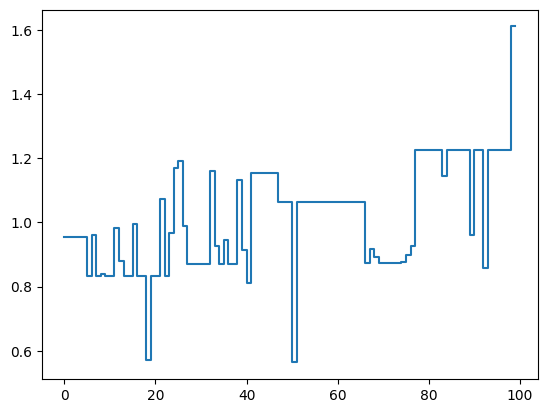

In [51]:
from veh_speed_sched_data import *

t = cvx.Variable(n)

t_min = np.array(d)/np.array(smax)
t_max = np.array(d)/np.array(smin)

obj = cvx.sum(a * cvx.multiply(d ** 2 , cvx.inv_pos(t)) + b * d + c * t)

constraints = [cvx.cumsum(t) >= tau_min]
constraints += [cvx.cumsum(t) <= tau_max]
constraints += [t <= t_max, t >= t_min]

problem = cvx.Problem(cvx.Minimize(obj), constraints)

problem.solve()

s = cvx.multiply(cvx.inv_pos(t), d)

print(f'Optimum amount of consumed = {obj.value}')

plt.step(range(n), s.value, label='optimal speed')

#Problem 4

In [44]:
#1
x= cvx.Variable(1,nonneg=True)
y= cvx.Variable(1,nonneg=True)

constraint = cvx.inv_pos(x) + cvx.inv_pos(y)
print(f"format of first problem is :{constraint.is_dcp()}")

#2
x= cvx.Variable(1,nonneg=True)
y= cvx.Variable(1,nonneg=True)

constraint = x >= cvx.inv_pos(y)
print(f"format of second problem is :{constraint.is_dcp()}")

#3

x= cvx.Variable(1)
y= cvx.Variable(1,nonneg=True)

constraint = cvx.quad_over_lin(x+y,cvx.sqrt(y)) - x + y +5 <=0
print(f"format of third problem is :{constraint.is_dcp()}")

#4

x= cvx.Variable(1,nonneg=True)
y= cvx.Variable(1,nonneg=True)
z= cvx.Variable(1)

constraint = x+z - 1 - cvx.geo_mean(cvx.vstack([y, (x - cvx.quad_over_lin(z,y))])) <=0
print(f"format of fourth problem is :{constraint.is_dcp()}")

format of first problem is :True
format of second problem is :True
format of third problem is :True
format of fourth problem is :True
